# Profile PreProcessing

## 1. Gray Filter
## 2. Cropping
## 3. Binary Inversion
## 4. Integration or Individuall OCR

스크린샷 위치 : C:\Users\KH_Home\Nox_share\ImageShare\Screenshots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [5]:
profile_path = './sample/profiles/'
profile_list = glob.glob(profile_path + '*.png')
for fn in profile_list:
    print(fn)

./sample/profiles\Screenshot_2020-07-17-19-21-52.png
./sample/profiles\Screenshot_2020-07-17-19-21-58.png
./sample/profiles\Screenshot_2020-07-17-19-22-05.png
./sample/profiles\Screenshot_2020-07-17-19-22-14.png
./sample/profiles\Screenshot_2020-07-17-19-22-20.png
./sample/profiles\Screenshot_2020-07-17-19-22-26.png
./sample/profiles\Screenshot_2020-07-17-19-22-33.png
./sample/profiles\Screenshot_2020-07-17-19-22-39.png
./sample/profiles\Screenshot_2020-07-17-19-22-45.png
./sample/profiles\Screenshot_2020-07-17-19-22-51.png
./sample/profiles\Screenshot_2020-07-17-19-22-57.png
./sample/profiles\Screenshot_2020-07-17-19-23-03.png
./sample/profiles\Screenshot_2020-07-17-19-23-10.png
./sample/profiles\Screenshot_2020-07-17-19-23-16.png
./sample/profiles\Screenshot_2020-07-17-19-23-22.png
./sample/profiles\Screenshot_2020-07-17-19-23-31.png
./sample/profiles\Screenshot_2020-07-17-19-23-37.png
./sample/profiles\Screenshot_2020-07-17-19-23-44.png
./sample/profiles\Screenshot_2020-07-17-19-23-

(720, 1280)


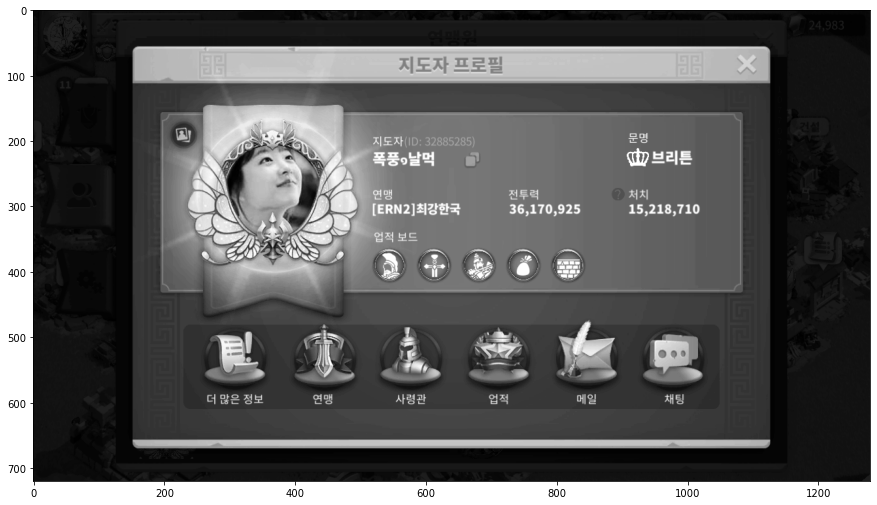

In [6]:
img = cv2.imread(profile_list[1],0)
print(img.shape)
plt.figure(figsize=(15,15))
plt.imshow(img, 'gray')
plt.show()

#### ID

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img[185:216, 595:672], 'gray')
plt.show()

#### Power

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img[290:320, 690:880], 'gray')
plt.show()

#### kill

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img[290:320, 880:1050], 'gray')
plt.show()

In [9]:
crop_dict = {
    'ID' : np.array([185, 216, 595, 672], dtype=int),
    'power' : np.array([290, 320, 690, 880], dtype=int),
    'kill' : np.array([290, 320, 880, 1050], dtype=int),
}

tesseract_path : C:\Users\ASUS\AppData\Local\Tesseract-OCR

In [ ]:
for key in crop_dict.keys():
    pos = crop_dict[key]
    tmp_img = img[pos[0]:pos[1], pos[2]:pos[3]]
    plt.imshow(tmp_img)
    plt.show()
    print(pytesseract.image_to_string(tmp_img))
    
    thr = 140
    ret,thresh2 = cv2.threshold(tmp_img,thr,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh2, 'gray')
    plt.show()
    print(pytesseract.image_to_string(thresh2))

In [ ]:
pos = crop_dict['ID']
tmp_img = img[pos[0]:pos[1], pos[2]:pos[3]]
plt.imshow(tmp_img, 'gray')
plt.show()
print(pytesseract.image_to_string(tmp_img))

In [7]:
def bin_inv(img, thr=140):
    ret,thresh2 = cv2.threshold(img,thr,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh2, 'gray')
    plt.show()
    print(pytesseract.image_to_string(thresh2))
    return thresh2

# ALL

In [ ]:
for fn in profile_list:
    img = cv2.imread(fn,0)
    plt.imshow(img, 'gray')
    plt.show()

    IDp = crop_dict['ID']
    powerp = crop_dict['power']
    killp = crop_dict['kill']
    
    img_ID = img[IDp[0]:IDp[1], IDp[2]:IDp[3]]
    img_power = img[powerp[0]:powerp[1], powerp[2]:powerp[3]]
    img_kill = img[killp[0]:killp[1], killp[2]:killp[3]]
    
    i1 = bin_inv(img_ID)
    i2 = bin_inv(img_power)
    i3 = bin_inv(img_kill)
    

    a = input('y or n')
    if a == 'n':
        break

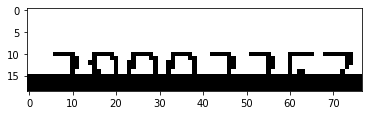

In [59]:
ret,thresh1 = cv2.threshold(img_ID[:19],45,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh1, 'gray')
plt.show()

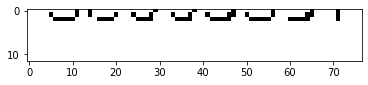

In [30]:
ret,thresh2 = cv2.threshold(img_ID[19:],140,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, 'gray')
plt.show()

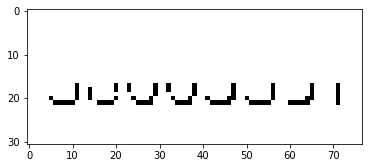

In [31]:
plt.imshow(np.vstack([thresh1, thresh2]), 'gray')
plt.show()

In [16]:
img_ID[:19]

array([[38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       ...,
       [80, 80, 80, ..., 80, 80, 80],
       [88, 88, 88, ..., 89, 89, 89],
       [94, 94, 94, ..., 95, 95, 95]], dtype=uint8)

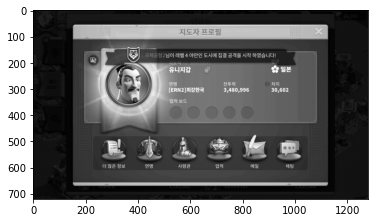

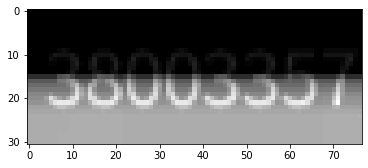

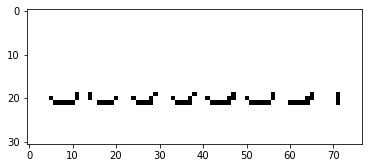

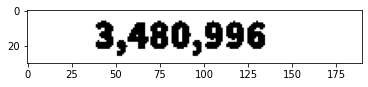

3,480,996


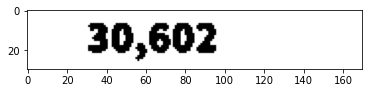

30,602


In [37]:
fn = profile_list[6]
img = cv2.imread(fn,0)
plt.imshow(img, 'gray')
plt.show()

IDp = crop_dict['ID']
powerp = crop_dict['power']
killp = crop_dict['kill']

img_ID = img[IDp[0]:IDp[1], IDp[2]:IDp[3]]
img_power = img[powerp[0]:powerp[1], powerp[2]:powerp[3]]
img_kill = img[killp[0]:killp[1], killp[2]:killp[3]]

plt.imshow(img_ID, 'gray')
plt.show()

i1 = bin_inv(img_ID)
i2 = bin_inv(img_power)
i3 = bin_inv(img_kill)

In [53]:
for i, row in enumerate(img_ID):
    print(np.min(row), np.max(row), int(np.mean(row)), i)

38 38 38 0
38 38 38 1
38 38 38 2
38 38 38 3
38 38 38 4
38 38 38 5
38 38 38 6
38 38 38 7
38 38 38 8
38 45 39 9
38 49 43 10
38 56 42 11
38 56 41 12
38 52 40 13
38 52 40 14
59 84 66 15
80 113 89 16
88 127 98 17
94 137 103 18
101 143 111 19
104 151 121 20
107 157 128 21
113 128 118 22
116 119 116 23
118 121 118 24
118 119 118 25
118 119 118 26
118 119 118 27
118 119 118 28
118 119 118 29
118 119 118 30


In [12]:
for i, row in enumerate(img_ID):
    print(i, row)

0 [38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38]
1 [38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38]
2 [38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38]
3 [38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38]
4 [38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 

In [13]:
for i, row in enumerate(i1):
    print(i, row)

0 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255]
1 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255]
2 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255]
3 [255 255 255 255 255 255 255 255 255 255 255 255 2

In [ ]:
fn = profile_list[4]
img = cv2.imread(fn,0)
plt.imshow(img, 'gray')
plt.show()

IDp = crop_dict['ID']
powerp = crop_dict['power']
killp = crop_dict['kill']

img_ID = img[IDp[0]:IDp[1], IDp[2]:IDp[3]]
img_power = img[powerp[0]:powerp[1], powerp[2]:powerp[3]]
img_kill = img[killp[0]:killp[1], killp[2]:killp[3]]

i1 = bin_inv(img_ID)
i2 = bin_inv(img_power)
i3 = bin_inv(img_kill)

In [ ]:
for i, row in enumerate(img_ID):
    print(i, row)

In [ ]:
for i, row in enumerate(i1):
    print(i, row)